In [61]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [62]:
# 2. Load Data (update path if needed)
df = pd.read_csv('/content/customer_booking.csv', encoding='ISO-8859-1')

In [63]:
# 3. Basic Info
print("Dataset Shape:", df.shape)
print(df.head())
print(df.info())

Dataset Shape: (50000, 14)
   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0   

In [64]:

# 4. Define target column
target_col = 'booking_complete'

In [65]:
# 5. Encode categorical variables
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [66]:
# 6. Handle missing values (drop rows with nulls for simplicity)
df = df.dropna()

In [67]:
# 7. Define features and target
X = df.drop(target_col, axis=1)
y = df[target_col]



In [68]:
# 8. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [69]:
# 9. Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
 #10. Predictions and Evaluation
y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Confusion Matrix:
[[12590   194]
 [ 1986   230]]


In [74]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     12784
           1       0.54      0.10      0.17      2216

    accuracy                           0.85     15000
   macro avg       0.70      0.54      0.55     15000
weighted avg       0.82      0.85      0.81     15000



In [71]:

# 11. Cross-validation score
scores = cross_val_score(model, X, y, cv=5)
print(f"\nCross-Validation Accuracy: {scores.mean():.4f}")




Cross-Validation Accuracy: 0.4901


<ipython-input-72-72c12430fb87>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


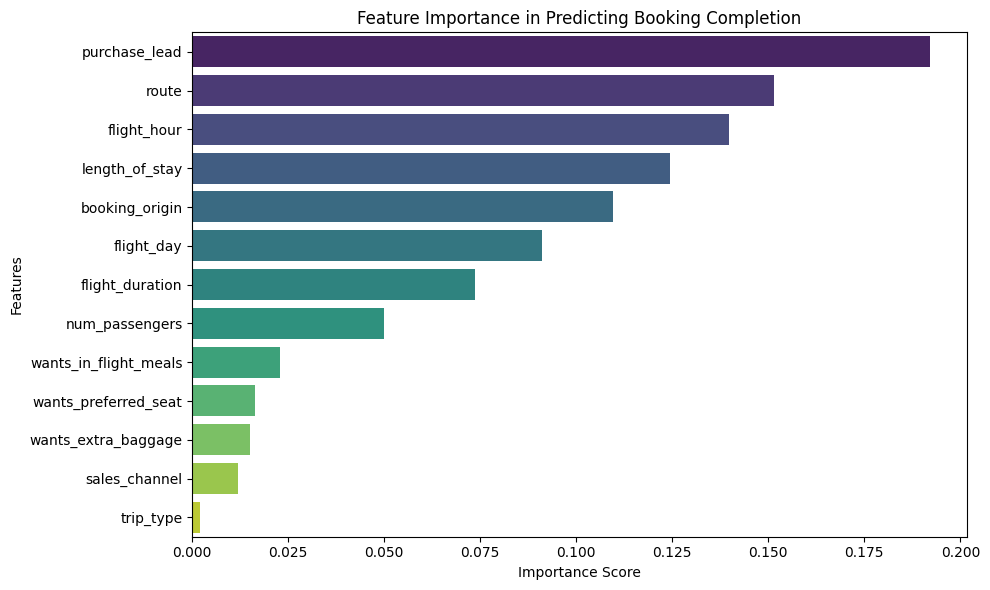

In [72]:
# 12. Feature Importance Plot
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance in Predicting Booking Completion")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()